In [65]:
import sys
sys.path.insert(1, 'C:/Users/Woon/Desktop/Columbia/Applied Analytics/Term3/Capstone/lib')

import helper_functions

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helper_functions import *

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

In [67]:
df = pd.read_json('data/gardenData.json')

In [68]:
df['year'].unique()

array([2021, 2022], dtype=int64)

In [69]:
df['review_lower'] = df['review_text'].str.lower()
df['review_type'] = df['review_type'].str.lower()

In [70]:
date = []

for i in range(len(df['review_creation_date'])):
    date.append(df['review_creation_date'][i][0:10])

df['date'] = date

In [71]:
i = []

for string in df['review_lower']:
    i.append(count_words(string))

df['word_count'] = i

In [75]:
min(df.date)
max(df.date)

'2021-06-01'

'2022-06-30'

In [32]:
df[df['price'] == 0]

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
1,Garden,32,Ironite Plus Lawn & Plant Food 3lb resealable bag,https://www.amazon.com/dp/B0030BNI8W,Amazon,Pennington Fertilizer,B0030BNI8W,B0030BNI8W,No,2021-08-14T00:00:00,2021,8,32,Theres nothing wrong with the product,"however, I should have done a price comparison...",organic reviews,0.0,4,0,0,1,No,"however, i should have done a price comparison...",2021-08-14,40
2,Garden,35,Ironite Plus Lawn & Plant Food 3lb resealable bag,https://www.amazon.com/dp/B0030BNI8W,Amazon,Pennington Fertilizer,B0030BNI8W,B0030BNI8W,No,2021-08-11T00:00:00,2021,8,32,good for my evergreen bushes,had some evergreen bushes and Cyprus trees tha...,organic reviews,0.0,4,0,0,0,No,had some evergreen bushes and cyprus trees tha...,2021-08-11,16
81,Garden,614,Lilly Miller 16-16-16 Lawn & Garden Food All P...,https://www.amazon.com/dp/B000XFAZES,Amazon,Pennington Fertilizer,B000XFAZES,B000XFAZES,No,2021-08-25T00:00:00,2021,8,34,Great products and it works as advertised.,I love it!,organic reviews,0.0,5,0,0,0,No,i love it!,2021-08-25,3
151,Garden,1375,IMAGE Herbicide Brush & Vine Killer Concentrate,https://www.amazon.com/dp/B000VIWQC6,Amazon,Image for Weeds,B000VIWQC6,B000VIWQC6,No,2021-07-09T00:00:00,2021,7,27,Not too shabby,Works pretty good but doesnt kill everything. ...,organic reviews,0.0,4,0,0,0,No,works pretty good but doesnt kill everything. ...,2021-07-09,43
152,Garden,1456,Image Kills Nutsedge Concentrate,https://www.amazon.com/dp/B000ONXGLS,Amazon,Image for Weeds,B000ONXGLS,B000ONXGLS,No,2021-07-19T00:00:00,2021,7,29,"Spray at the base, get it in the root system",It works fantastic and wont kill your grass.. ...,organic reviews,0.0,5,0,0,0,No,it works fantastic and wont kill your grass.. ...,2021-07-19,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26470,Garden,142402,Pennington Premium Black Oil Sunflower Bird Seed,http://www.homedepot.com/p/312026381,Homedepot,Pennington Bird,312026382,312026381,Yes,2022-06-26T00:00:00,2022,6,25,Good quality sunflower seeds. The birds seem t...,Good quality sunflower seeds. The birds seem t...,organic reviews,0.0,5,0,0,0,No,good quality sunflower seeds. the birds seem t...,2022-06-26,12
26471,Garden,142403,Pennington Premium Black Oil Sunflower Bird Seed,http://www.homedepot.com/p/312026381,Homedepot,Pennington Bird,312026382,312026381,Yes,2022-06-30T00:00:00,2022,6,26,"Great the Cardinals love it. And, no chance of...","Great the Cardinals love it. And, no chance of...",organic reviews,0.0,5,0,0,0,No,"great the cardinals love it. and, no chance of...",2022-06-30,12
26472,Garden,142404,Pennington Premium Black Oil Sunflower Bird Seed,http://www.homedepot.com/p/312026381,Homedepot,Pennington Bird,312026382,312026381,Yes,2022-06-08T00:00:00,2022,6,23,Its birdseed. The birds like it. I didnt have ...,Its birdseed. The birds like it. I didnt have ...,organic reviews,0.0,5,0,0,0,No,its birdseed. the birds like it. i didnt have ...,2022-06-08,40
28454,Garden,150367,Contractors Mix Central 7lb bag,https://www.walmart.com//ip/Pennington-Central...,Walmart,Pennington Grass,647317330,647317330,Yes,2022-05-21T00:00:00,2022,5,20,SEED NOT IDENTIFIED,Yeah this is just rye grass which would be FIN...,syndicated reviews,0.0,1,0,0,0,No,yeah this is just rye grass which would be fin...,2022-05-21,56


In [33]:
df[df['price'] == 0]['producturl']
#check other reviews of the same product for the price

1                     https://www.amazon.com/dp/B0030BNI8W
2                     https://www.amazon.com/dp/B0030BNI8W
81                    https://www.amazon.com/dp/B000XFAZES
151                   https://www.amazon.com/dp/B000VIWQC6
152                   https://www.amazon.com/dp/B000ONXGLS
                               ...                        
26470                 http://www.homedepot.com/p/312026381
26471                 http://www.homedepot.com/p/312026381
26472                 http://www.homedepot.com/p/312026381
28454    https://www.walmart.com//ip/Pennington-Central...
28455    https://www.walmart.com//ip/Pennington-Central...
Name: producturl, Length: 2135, dtype: object

In [34]:
len(df[df['price'] == 0]['producturl'])

2135

In [35]:
len(df[df['price'] == 0]['producturl'].unique())

71

In [36]:
df.to_csv('data\processed_data.csv')

In [37]:
df.isnull().sum()
#some missing values in review_title (not an issue)

segment                   0
review_id                 0
product_name              0
producturl                0
retailer                  0
brand                     0
retailer_product_id       0
base_id                   0
variants_flag             0
review_creation_date      0
year                      0
month                     0
week                      0
review_title            847
review_text               0
review_type               0
price                     0
rating                    0
images                    0
videos                    0
helpful_votes             0
promotion_flag            0
review_lower              0
date                      0
word_count                0
dtype: int64

In [38]:
df.loc[df['review_text'].duplicated(keep=False), :]
#check the length of ther reviews
#check the number of duplicates to see if it's a significant amount

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
31,Garden,345,AMDRO Fire Ant Bait 2lb,https://www.amazon.com/dp/B002FYMTB2,Amazon,Amdro,B002FYMTB2,B002FYMTB2,No,2021-08-18T00:00:00,2021,8,33,Good,Works great,organic reviews,20.59,5,0,0,0,No,works great,2021-08-18,2
36,Garden,361,AMDRO Fire Ant Bait 2lb,https://www.amazon.com/dp/B002FYMTB2,Amazon,Amdro,B002FYMTB2,B002FYMTB2,No,2021-08-11T00:00:00,2021,8,32,Rid those ANTS now,Great product,organic reviews,20.59,5,0,0,0,No,great product,2021-08-11,2
51,Garden,439,AMDRO Fire Ant Bait 2lb,https://www.amazon.com/dp/B002FYMTB2,Amazon,Amdro,B002FYMTB2,B002FYMTB2,No,2021-07-26T00:00:00,2021,7,30,Works great,Works great!,organic reviews,20.59,5,0,0,0,No,works great!,2021-07-26,2
134,Garden,1294,AMDRO Ant Block Home Perimeter Ant Bait 12oz,https://www.amazon.com/dp/B001H1JKSY,Amazon,Amdro,B001H1JKSY,B001H1JKSY,No,2021-08-15T00:00:00,2021,8,32,Does not work ants came back in week,Does not work,organic reviews,8.88,1,0,0,0,No,does not work,2021-08-15,3
406,Garden,3350,AMDRO Ant Block Home Perimeter Ant Bait 24oz,https://www.amazon.com/dp/B000QDEQ7E,Amazon,Amdro,B000QDEQ7E,B000QDEQ7E,No,2021-07-28T00:00:00,2021,7,30,Buy!,Excellent,organic reviews,14.47,5,0,0,0,No,excellent,2021-07-28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28781,Garden,150694,"Pennington Smart Patch Dense Shade Mix, 12 lb",https://www.walmart.com//ip/Pennington-Smart-P...,Walmart,Pennington Grass,658916879,658916879,Yes,2022-05-22T00:00:00,2022,5,20,Perfect all in one,I received product reimbursement in exchange f...,organic reviews,29.98,5,0,0,0,No,i received product reimbursement in exchange f...,2022-05-22,79
28782,Garden,150695,"Pennington Smart Patch Dense Shade Mix, 12 lb",https://www.walmart.com//ip/Pennington-Smart-P...,Walmart,Pennington Grass,658916879,658916879,Yes,2022-05-24T00:00:00,2022,5,21,Stays Put,I received product reimbursement in exchange f...,organic reviews,29.98,5,0,0,0,No,i received product reimbursement in exchange f...,2022-05-24,64
28783,Garden,150696,"Pennington Smart Patch Dense Shade Mix, 12 lb",https://www.walmart.com//ip/Pennington-Smart-P...,Walmart,Pennington Grass,658916879,658916879,Yes,2022-05-29T00:00:00,2022,5,21,Still a Wait,I received product reimbursement in exchange f...,organic reviews,29.98,5,0,0,0,No,i received product reimbursement in exchange f...,2022-05-29,60
28784,Garden,150697,"Pennington Smart Patch Dense Shade Mix, 12 lb",https://www.walmart.com//ip/Pennington-Smart-P...,Walmart,Pennington Grass,658916879,658916879,Yes,2022-05-27T00:00:00,2022,5,21,Works quick,I received product reimbursement in exchange f...,organic reviews,29.98,5,0,0,0,No,i received product reimbursement in exchange f...,2022-05-27,96


In [39]:
len(df['retailer'].unique())

4

In [40]:
df['retailer'].value_counts()

Homedepot    16332
Walmart       5060
Lowes         4856
Amazon        2538
Name: retailer, dtype: int64

In [41]:
df['brand'].value_counts()

Pennington Grass         9769
Pennington Bird          6439
GardenTech               4912
Amdro                    2091
Pennington Fertilizer    1941
Image for Weeds          1183
Moss Out                  881
Expert Gardener           736
Corry's                   478
Eliminator                279
Earth Juice                77
Name: brand, dtype: int64

In [42]:
df.groupby(['retailer', 'brand'])['review_text'].count().reset_index()

,retailer,brand,review_text
0,Amazon,Amdro,796
1,Amazon,Corry's,128
2,Amazon,Earth Juice,33
3,Amazon,GardenTech,166
4,Amazon,Image for Weeds,36
5,Amazon,Moss Out,165
6,Amazon,Pennington Bird,194
7,Amazon,Pennington Fertilizer,167
8,Amazon,Pennington Grass,853
9,Homedepot,Amdro,964


In [51]:
#df['review_type'].unique()
df[df['review_type'] == 'organic reviews']['retailer'].unique()

array(['Amazon', 'Homedepot', 'Lowes', 'Walmart'], dtype=object)

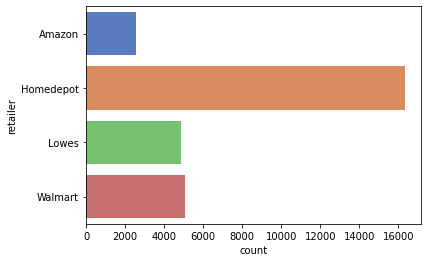

In [81]:
sns.countplot(y='retailer', data=df, palette = "muted");
plt.savefig('figs/retailer_histogram.jpg', bbox_inches = 'tight');

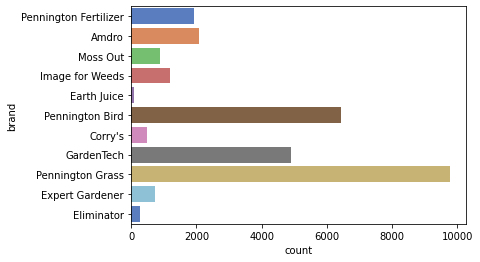

In [80]:
sns.countplot(y='brand', data=df, palette = "muted");
plt.savefig('figs/brand_histogram.jpg', bbox_inches = 'tight');

### Most reviewed brand for each retailer

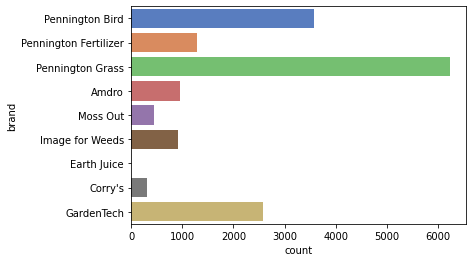

In [60]:
sns.countplot(y='brand', data=df[df['retailer']=='Homedepot'], palette = "muted");

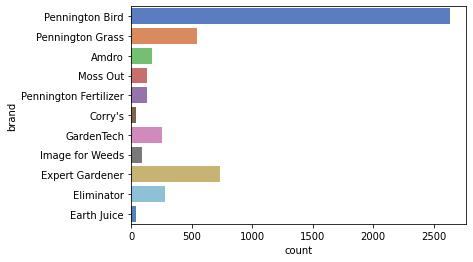

In [61]:
sns.countplot(y='brand', data=df[df['retailer']=='Walmart'], palette = "muted");

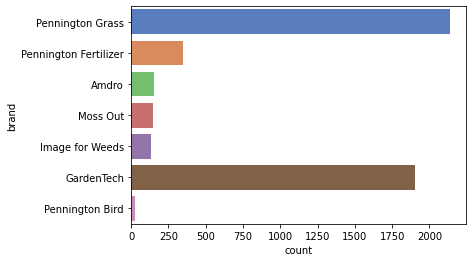

In [62]:
sns.countplot(y='brand', data=df[df['retailer']=='Lowes'], palette = "muted");

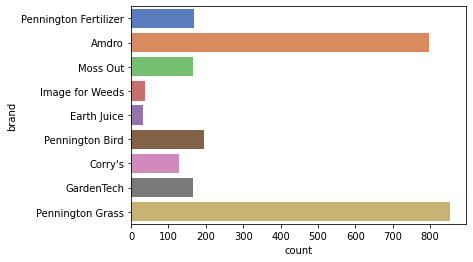

In [63]:
sns.countplot(y='brand', data=df[df['retailer']=='Amazon'], palette = "muted");

<AxesSubplot:xlabel='month', ylabel='Count'>

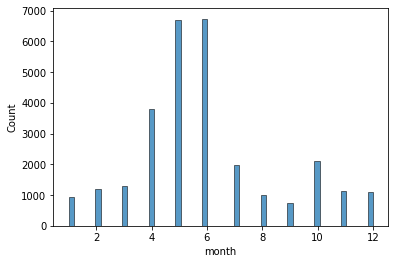

In [41]:
sns.histplot(x = 'month', data = df);
#Most reviews are from spring + early summer
#spike in reviews where there are promotions
# check the actual review-ratings
# extract and remove reviews ("leaving a review bc of promo or smth")
# some outliers in reviews

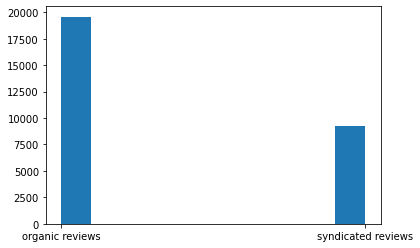

In [59]:
plt.hist(df.review_type);